<a href="https://colab.research.google.com/github/mrsferret/Code-Division/blob/main/Worksheets/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [1]:
import pandas as pd

def inspect_data(df):

  # firstly, sort the data on movie, director and year
  df = df.sort_values(by = ["name", "last_name", "first_name", "year"])
  display("Describe: ", df.describe())
  display("Head: ", df.head())
  display("Info: ", df.info())

  # check the data for NA/NaN/missing values across the dataframe
  display("Null Values: ", df.isnull().values.any())

  #============================================================================
  # null values do exist in the dataset and df.info() indicates that column "rank"
  # is only column with them
  #============================================================================
  display("Null Values: ", df.isnull().values.any())
  '''' is any missing values in dataframe '''
  display(df.isnull())

  #============================================================================
  # lets look more closely at the rank column as we know it contains null values
  # check what unique values are stored in this column and its count
  #============================================================================
  print("\nUnique values from column rank...\n",df['rank'].unique())
  print("\nCount unique values from a column ...\n",df['rank'].nunique())

  ### get count of missing values of a particular column
 
  #display ("Count of missing values in rank col: ", df.rank.isnull().sum())
  #display (df.rank.isnull().sum())

  display("count of missing values: ", df.isnull().sum())
  display (df.isnull().sum()/len(df)*100)

  #============================================================================
  # lets look more closely at the genre column to check what values are stored 
  # in this column and its count
  #============================================================================

  print("\nUnique values from column genre...\n",df['genre'].unique())
  print("\nCount unique values from a column ...\n",df['genre'].nunique())

  #========================================================================
  # should only be 1 row per movie so check for duplicates
  #========================================================================
  duplicates = find_duplicates(df)
  
  #========================================================================
  # count how many movies have max rating of 9.9
  #========================================================================
  print("Count of movies with 9.9 rank: ",df['rank'].value_counts()[9.9])

def find_duplicates(df):
  #duplicates = df[df.duplicated(['name','last_name','year'])]
  duplicates = df[df.duplicated(['name'],keep=False)]
  display("Duplicate Values")
  display(duplicates.sort_values(by = ["name", "last_name", "year"]))
  display("\nCount unique values from name column ...\n",duplicates['name'].nunique())

  # check if all duplicates have missing values
  display("count of missing values in duplicates: ", duplicates.isnull().sum())
  display (duplicates.isnull().sum()/len(duplicates)*100)

  return duplicates 
  

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

inspect_data(movie_df)

'Describe: '

,Unnamed: 0,year,rank
count,368894.000000,368894.000000,113376.000000
mean,184446.500000,1969.442222,5.995124
std,106490.669438,29.082051,1.540330
min,0.000000,1888.000000,1.000000
25%,92223.250000,1947.000000,5.100000
50%,184446.500000,1976.000000,6.200000
75%,276669.750000,1996.000000,7.100000
max,368893.000000,2007.000000,9.900000


'Head: '

,Unnamed: 0,first_name,last_name,name,year,rank,genre
11330,11330,Mohamed,Asli,Casablanca les anges ne volent pas,2004,NaN,Drama
265567,265567,Diane,Pierens,Clara,1994,NaN,Drama
265568,265568,Diane,Pierens,Clara,1994,NaN,Family
265569,265569,Diane,Pierens,Clara,1994,NaN,Short
274883,274883,Francisco,Ramalho Jr.,Flor da Pele,1976,5.5,Drama


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 11330 to 218388
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB


'Info: '

None

'Null Values: '

True

'Null Values: '

True

,Unnamed: 0,first_name,last_name,name,year,rank,genre
11330,False,False,False,False,False,True,False
265567,False,False,False,False,False,True,False
265568,False,False,False,False,False,True,False
265569,False,False,False,False,False,True,False
274883,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
170647,False,False,False,False,False,True,False
170648,False,False,False,False,False,True,False
218386,False,False,False,False,False,True,False
218387,False,False,False,False,False,True,False



Unique values from column rank...
 [nan 5.5 8.7 5.1 5.2 7.8 6.  7.2 4.  6.8 3.1 3.9 6.2 5.8 4.3 6.4 7.3 8.1
 7.5 8.2 3.2 7.9 6.3 5.6 7.1 5.  7.  6.7 6.5 9.6 5.4 6.6 4.9 7.7 6.1 3.5
 6.9 5.7 1.6 4.6 2.  4.8 5.9 3.8 7.4 2.4 4.4 4.7 8.  3.6 5.3 2.8 4.5 2.3
 4.1 8.8 3.3 2.2 9.  7.6 9.8 8.4 9.3 4.2 9.5 8.3 1.4 3.4 2.5 3.7 1.8 9.2
 3.  8.5 2.7 2.9 9.4 1.9 8.9 8.6 9.1 9.7 2.6 1.7 1.  2.1 1.5 1.3 9.9 1.1
 1.2]

Count unique values from a column ...
 90


'count of missing values: '

Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          255518
genre              0
dtype: int64

Unnamed: 0     0.000000
first_name     0.000000
last_name      0.000000
name           0.000000
year           0.000000
rank          69.265968
genre          0.000000
dtype: float64


Unique values from column genre...
 ['Drama' 'Family' 'Short' 'Comedy' 'Documentary' 'Musical' 'Romance'
 'Fantasy' 'Crime' 'Horror' 'Mystery' 'War' 'Thriller' 'Animation'
 'Western' 'Music' 'Action' 'Sci-Fi' 'Adventure' 'Film-Noir']

Count unique values from a column ...
 20


'Duplicate Values'

,Unnamed: 0,first_name,last_name,name,year,rank,genre
265567,265567,Diane,Pierens,Clara,1994,NaN,Drama
265568,265568,Diane,Pierens,Clara,1994,NaN,Family
265569,265569,Diane,Pierens,Clara,1994,NaN,Short
128110,128110,Pierre-Marie,Goulet,Gaule,1974,NaN,Documentary
128111,128111,Pierre-Marie,Goulet,Gaule,1974,NaN,Short
...,...,...,...,...,...,...,...
170647,170647,Kemal,Kan,zmc kizin kaderi,1961,NaN,Drama
170648,170648,Kemal,Kan,zmc kizin kaderi,1961,NaN,Romance
218386,218386,Seiji (I),Maruyama,zora no samurai,1976,NaN,Action
218387,218387,Seiji (I),Maruyama,zora no samurai,1976,NaN,Drama


'\nCount unique values from name column ...\n'

99029

'count of missing values in duplicates: '

Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          181105
genre              0
dtype: int64

Unnamed: 0     0.000000
first_name     0.000000
last_name      0.000000
name           0.000000
year           0.000000
rank          66.896544
genre          0.000000
dtype: float64

Count of movies with 9.9 rank:  55




---


# **Inspecting the Data Notes**

---


1.   On initial look at the data, I can see that the dataset has **368894** rows. From  **.info()**, the only column that contains null data is the "**rank**" column. This will need to be cleaned. The first column in the dataframe is called "**Unnamed: 0**" and on initial inspection it looks like it is just a record number. Will need to look at this further.

2.   **Rank Column** - Looking more closely at the rank column which contains null values, we can see that there are **255518** records with a missing rank value and this represents nearly **70%** of the total number of recs. There are **90** unique values in this column (including nan) with a **max value of 9.9** and a **minimum of 1**. This leaves us with the question of what to do with the rank column? Options are to **a)** drop the column entirely from the dataframe **b)** somehow impute a sensible value for the empty fields **c)** remove only those records that have an empty rank value, although this would result in a dataset **reduced by nearly 70%**, a not insignificant amount.

1.  **Duplicate row check** - when checking for duplicates, no Movie/Director/Year combination should have more than 1 row. When check for rows with duplicate values, **138290** rows are returned (includes all duplicate rows) which represents **89140** rows with a unique movie name. From this initial check, it looks possible that all duplicate rows have missing values in the **rank** column. Check this out.
2.   After checking whether all duplicates have missing values in the **rank** column, I can see that this is not actually the case. Of **138290** duplicate rows returned, only **88465** of these have missing values in the rank field


2.   List item



 






### Clean the dataset 
---


In [2]:
from os import name
import pandas as pd

def clean_data(df):

  # ==========================================
  # drop first col as not needed
  # ================================================================
  df= df.drop('Unnamed: 0',axis=1)

  # ================================================================
  # remove rows where col rank is null
  # ================================================================
  clean_df = df[~df["rank"].isnull()]
  #display (clean_df)

  # ================================================================
  # remove leading/trailing spaces from strings
  # ================================================================
 
  # removing whitespace from more than 1 column
  clean_df['name'].str.strip()
  clean_df['first_name'].str.strip()
  clean_df['last_name'].str.strip()

  # ================================================================
  # now that non-nulls removed, remove duplicate movie recs
  # ================================================================
  clean_duplicates = clean_df.drop_duplicates(subset = ['name'], keep = 'last')
  #display ('Cleaned Duplicates: ', clean_duplicates.head(100))

  display("Sorted Duplicate Values: ")
  sorted_df = clean_duplicates.sort_values(by = ["name"])
  #with pd.option_context('display.max_rows', 500,):
  #  print("Sorted: ", sorted_df)
    
  #display("\nCount unique values from name column ...\n",sorted_df['name'].nunique())
  #duplicates = sorted_df[clean_duplicates.duplicated(['name'])]
  #display ("Duplicates after cleaning: ", sorted_df)

  display("Info: ", sorted_df.info())

  return sorted_df
  
# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

clean_data(movie_df)



'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

,first_name,last_name,name,year,rank,genre
274883,Francisco,Ramalho Jr.,Flor da Pele,1976,5.5,Drama
233647,Evaldo,Mocarzel,Margem da Imagem,2003,8.7,Documentary
233670,Giuseppe,Moccia,arrivato mio fratello,1985,5.1,Comedy
118878,Pierre,Gaspard-Huit,belles dents,1966,5.5,Drama
216153,Mario,Marret,"bientt, j'espre",1968,5.2,Documentary
...,...,...,...,...,...,...
81940,Jacques,Demy,vnement le plus important depuis que l'homme a...,1973,4.5,Comedy
1900,Amable,Aguiluz,www.XXX.com,2003,1.0,Romance
20127,Mariano,Barroso,xtasis (1996/I),1996,7.6,Drama
198580,Gianni,Lepre,ye for ye,1985,4.5,Drama




---


# **Cleaning the Dataset Notes**


---



1.  **Missing Values** - Column **rank** is the only col with missing values. It is a vital piece of info for our data analysis so I'm left with the choice somehow imputing a sensible value into this col or deleting all rows where it has null values or it is non-numeric. As there is no means to impute a sensible value, I have decided that I will need to disregard all rows where rank is not present in all further analysis.

2.   **Cleaning duplicates** - logically there should be 1 record per movie in the dataset, however looking at the data I can see that there are duplicates



### How many movies of each genre are there?
---

In [ ]:
import pandas as pd

def movies_by_genre(df):

  #movie_by_genre_cnt = df[["genre"]].groupby("genre").
  movie_by_genre_cnt = df.groupby("genre").count()
  display ("Number of movies by genre: ", movie_by_genre_cnt.name)

  #dept_emp_num =  employee.groupby('DEPT')['DEPT'].count()

  return

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)
movies_by_genre(df)


  

'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

'Number of movies by genre: '

genre
Action           882
Adventure        898
Animation        175
Comedy          7157
Crime            959
Documentary     2167
Drama          14111
Family          1179
Fantasy          855
Film-Noir        231
Horror          1924
Music            535
Musical         1267
Mystery          979
Romance         4237
Sci-Fi          1765
Short           8143
Thriller        4748
War             1614
Western         2128
Name: name, dtype: int64

### Which director has the highest ranked movies?
---

In [ ]:
import pandas as pd

def find_max_rank_director(df):

  #========================================================================
  # count and list movies with the max rating of 9.9
  #========================================================================
  print("Count of movies with 9.9 rank: ",df['rank'].value_counts()[9.9])
  top_movies = df.loc[df['rank'] == 9.9]
   
  display ("Movies with max rating of 9.9: ", top_movies)
  
  #======================================================================
  # now Sort top 20 movies by director
  #======================================================================
  #sorted_by_director_df = top_movies.sort_values(by = ["last_name","first_name","name"], ascending=False)
  sorted_by_director_df = top_movies.sort_values(by = ["last_name"], ascending=False)
  display ("Top Movies sorted by Director: ", sorted_by_director_df.iloc[:55] )

  #======================================================================
  # Display Director with highest ranked movies
  #======================================================================
  print("Director with highest ranked movies: ", sorted_by_director_df['last_name'].mode())  

  return

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)
find_max_rank_director(df)

'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

Count of movies with 9.9 rank:  27


'Movies with max rating of 9.9: '

,first_name,last_name,name,year,rank,genre
247643,Sergiu,Nicolaescu,Atunci i-am condamnat pe toti la moarte,1971,9.9,War
81826,Jonathan,Demme,"Complex Sessions, The",1994,9.9,Short
366482,Gregg,Zehentner,Dawn of the Friend,2004,9.9,Short
57506,Benjamin,Christensen,"Devil's Circus, The",1926,9.9,Drama
36188,Julio (I),Bracho,Distinto amanecer,1943,9.9,Thriller
34473,Satyen,Bose,Dosti,1964,9.9,Musical
289053,Carole,Roussopoulos,Genet parle d'Angela Davis,1970,9.9,Short
246689,See-Yuen,Ng,Gong fu qi jie,1979,9.9,Action
26589,Ishmael,Bernal,Himala,1982,9.9,Drama
293006,András,Salamon,Huttyn,1996,9.9,Documentary


'Top Movies sorted by Director: '

,first_name,last_name,name,year,rank,genre
366482,Gregg,Zehentner,Dawn of the Friend,2004,9.9,Short
366355,Arünas,Zebriünas,Velnio nuotaka,1973,9.9,Musical
356621,Ioana,Wieder,"Marche des femmes Hendaye, La",1975,9.9,Short
337071,Jirí (I),Trnka,Star povesti cesk,1953,9.9,Animation
336670,Kirsten,Tretbar,Zenith,2001,9.9,Documentary
293006,András,Salamon,Huttyn,1996,9.9,Documentary
289053,Carole,Roussopoulos,Genet parle d'Angela Davis,1970,9.9,Short
289096,Carole,Roussopoulos,"Prostitues de Lyon parlent, Les",1975,9.9,Short
271950,Vsevolod,Pudovkin,Ubijtsi vykhodyat na dorogu,1942,9.9,War
247643,Sergiu,Nicolaescu,Atunci i-am condamnat pe toti la moarte,1971,9.9,War


Direcor with highest ranked movies:  0    Roussopoulos
dtype: object


### How many movies have ranks of over 9?
---


In [ ]:
import pandas as pd

def find_rank_gt_nine(df):

  #rank_gt_nine_cnt = df
  #========================================================================
  # count how many movies have rating > 9
  #=============p===========================================================
  
  display ("Count of Movies with rank > 9: ", len(df[(df["rank"] > 9)]))
  
  return

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)
find_rank_gt_nine(df)


'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

'Count of Movies with rank > 9: '

796

### Plot a bar chart of mean rank and genre
---

'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

'rank:'

genre
Action         4.575057
Adventure      5.190535
Animation      6.572000
Comedy         5.576191
Crime          5.537852
Documentary    6.684079
Drama          6.093650
Family         5.852757
Fantasy        5.725029
Film-Noir      6.609091
Horror         4.412994
Music          6.378505
Musical        5.910813
Mystery        5.896118
Romance        6.126859
Sci-Fi         4.749462
Short          6.512587
Thriller       5.512742
War            6.384449
Western        5.634445
Name: rank, dtype: float64

'labels: '

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre')

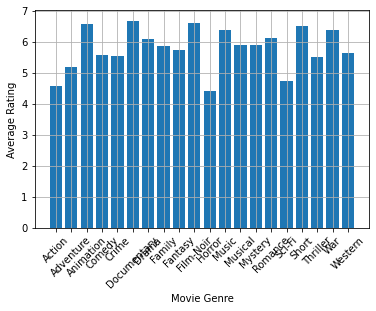

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def chart_mean_rank_genre(df):

  data = psych_data_df.groupby(['firstlanguage']).mean()
  stress = data['Stress']

  # group by genre/mean rank  
  mean_genre_rank = df.groupby("genre").mean()
  rank = mean_genre_rank['rank']
  display("rank:", rank)
  labels = rank.keys()
  display("labels: ", labels)

  plt.bar(labels, rank)
  plt.xticks(rotation=45)
  plt.xlabel('Movie Genre')
  plt.ylabel('Average Rating')
  plt.grid()
  plt.show()

  #plt.pie(rank, labels=labels)
  #plt.show()


  #mean_genre_rank = df[["genre", "rank"]].groupby("genre").mean()
  #print(avg_age)
  #display ("mean_genre_rank ", mean_genre_rank.info())
  #display ("Info: ", mean_genre_rank.info())

  

  #labels = mean_genre_rank.keys()
  #display ("labels: ", labels)

  #plt.plot(labels, mean_genre_rank)
  #plt.xsticks(rotation=45)
  #plt.grid()
  #plt.show()

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)

chart_mean_rank_genre(df)

Index(['Age', 'English', 'firstlanguage', 'sex', 'origin', 'Ukresidence',
       'MAAS', 'Resilliance', 'Wellbeing', 'Stress', 'selfesteem', 'LoC',
       'sleep', 'Year'],
      dtype='object')

firstlanguage
Arabic      28.000000
Burmese     20.000000
Chinese     22.888889
German       3.000000
Greek       32.000000
Hindi       17.000000
Japanese    14.000000
Romanian    27.000000
Slovak      21.000000
Name: Stress, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


21.65909090909091

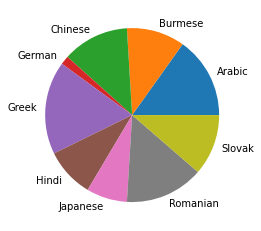

In [15]:
  url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

  psych_data_df=pd.read_csv(url)
  display(psych_data_df.columns)

  data = psych_data_df.groupby(['firstlanguage']).mean()
  stress = data['Stress']
  display (stress)

  labels = stress.keys()
  labels

  overall_mean = psych_data_df.mean()
  overall_stress = overall_mean['Stress']
  display (overall_stress)

  plt.pie(stress, labels=labels)
  plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


### Plot a graph showing the mean Rank for each year 

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  
2.  
3.   

### Complete the tasks you have set out in the exercise above. 
---


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: